In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose


# EXERCISE 1: Time Series Analysis
## Use the “employment.csv” data set and perform time series analysis and visualization through the following questions

In [2]:
df=pd.read_csv("Week 7\employment.csv")

In [3]:
df.head()

,datestamp,Agriculture,Business services,Construction,Durable goods manufacturing,Education and Health,Finance,Government,Information,Leisure and hospitality,Manufacturing,Mining and Extraction,Nondurable goods manufacturing,Other,Self-employed,Transportation and Utilities,Wholesale and Retail Trade
0,2000-01-01,10.3,5.7,9.7,3.2,2.3,2.7,2.1,3.4,7.5,3.6,3.9,4.4,4.9,2.3,4.3,5.0
1,2000-02-01,11.5,5.2,10.6,2.9,2.2,2.8,2.0,2.9,7.5,3.4,5.5,4.2,4.1,2.5,4.0,5.2
2,2000-03-01,10.4,5.4,8.7,2.8,2.5,2.6,1.5,3.6,7.4,3.6,3.7,5.1,4.3,2.0,3.5,5.1
3,2000-04-01,8.9,4.5,5.8,3.4,2.1,2.3,1.3,2.4,6.1,3.7,4.1,4.0,4.2,2.0,3.4,4.1
4,2000-05-01,5.1,4.7,5.0,3.4,2.7,2.2,1.9,3.5,6.2,3.4,5.3,3.6,4.5,1.9,3.4,4.3


### 1. Convert datestamp column to a datetime object and Set the datestamp columns as the index of your DataFrame. Check if there are missing values in each column.

In [4]:
df['datestamp'] = pd.to_datetime(df['datestamp'])

In [5]:
df.set_index('datestamp', inplace=True)


In [6]:
df.isnull().sum()

Agriculture                       0
Business services                 0
Construction                      0
Durable goods manufacturing       0
Education and Health              0
Finance                           0
Government                        0
Information                       0
Leisure and hospitality           0
Manufacturing                     0
Mining and Extraction             0
Nondurable goods manufacturing    0
Other                             0
Self-employed                     0
Transportation and Utilities      0
Wholesale and Retail Trade        0
dtype: int64

There are no null values

### 2. Generate a boxplot to find the distribution of unemployment rate for every industry .

In [7]:
df_melted = df.reset_index().melt(id_vars='datestamp', var_name='Industry', value_name='Unemployment Rate')

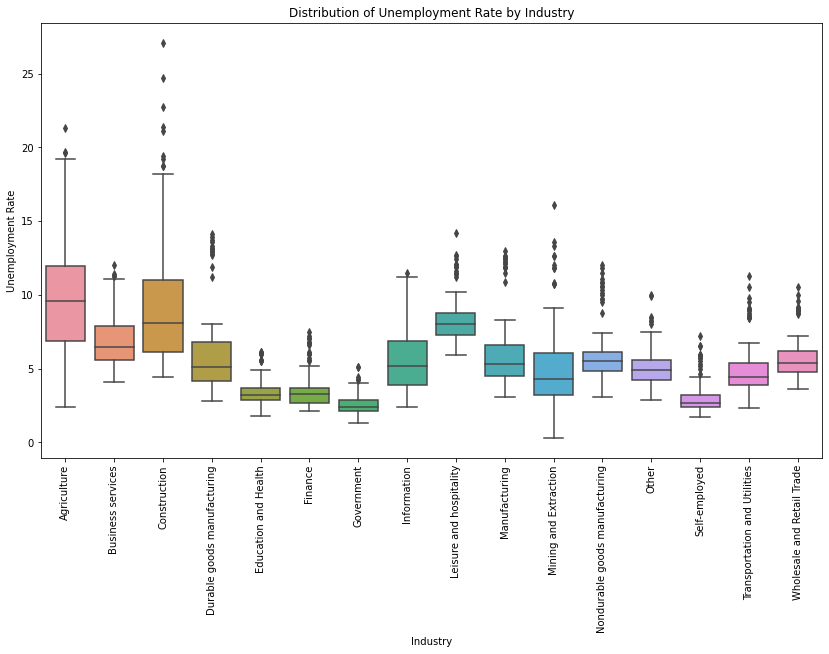

In [8]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Industry', y='Unemployment Rate', data=df_melted)
plt.xticks(rotation=90)
plt.title('Distribution of Unemployment Rate by Industry')
plt.xlabel('Industry')
plt.ylabel('Unemployment Rate')
plt.show()

### 3. Using line chart Visualize the unemployment rate of workers by industry .

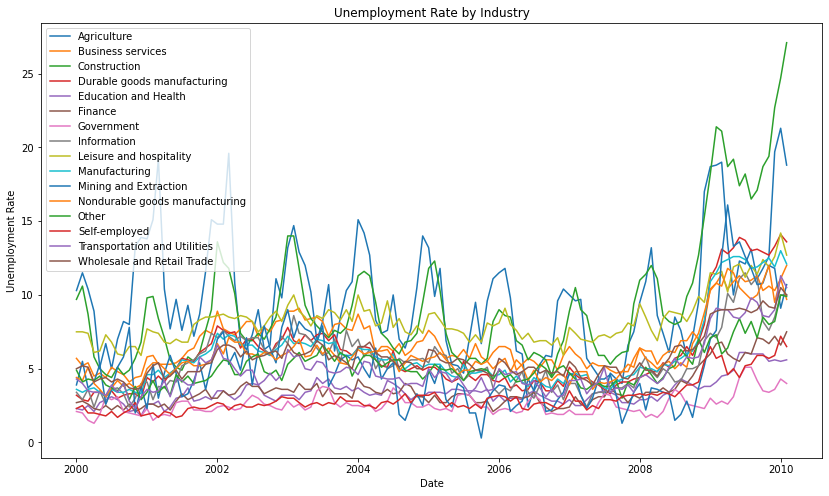

In [9]:
plt.figure(figsize=(14, 8))
for industry in df.columns:
    plt.plot(df.index, df[industry], label=industry)
plt.title('Unemployment Rate by Industry')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.legend(loc='upper left')
plt.show()

### 4. Plot the monthly and yearly trends

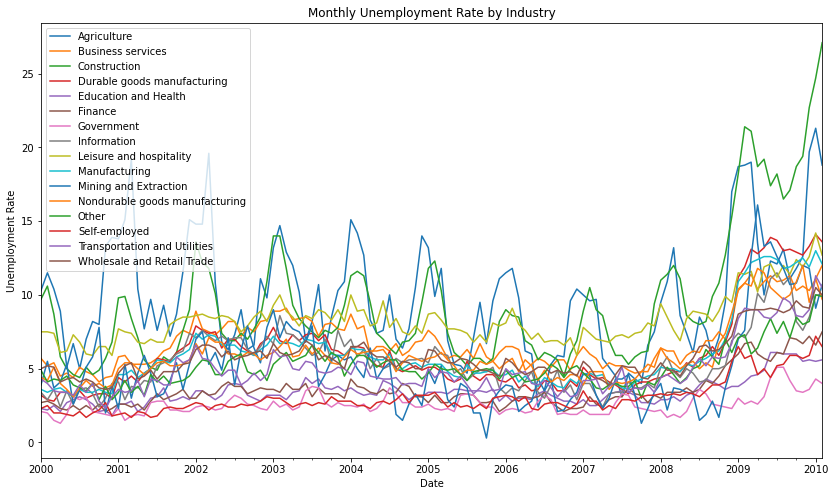

In [10]:
# Resampling to monthly frequency and plotting monthly trends
plt.figure(figsize=(14, 8))
for industry in df.columns:
    df[industry].resample('M').mean().plot(label=industry)

plt.title('Monthly Unemployment Rate by Industry')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.legend(loc='upper left')
plt.show()


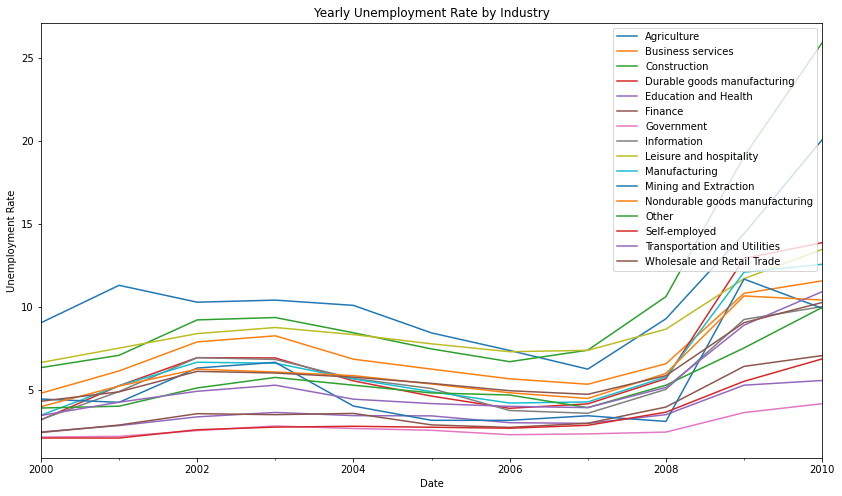

In [11]:

plt.figure(figsize=(14, 8))
for industry in df.columns:
    df[industry].resample('Y').mean().plot(label=industry)

plt.title('Yearly Unemployment Rate by Industry')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.legend(loc='upper right')
plt.show()


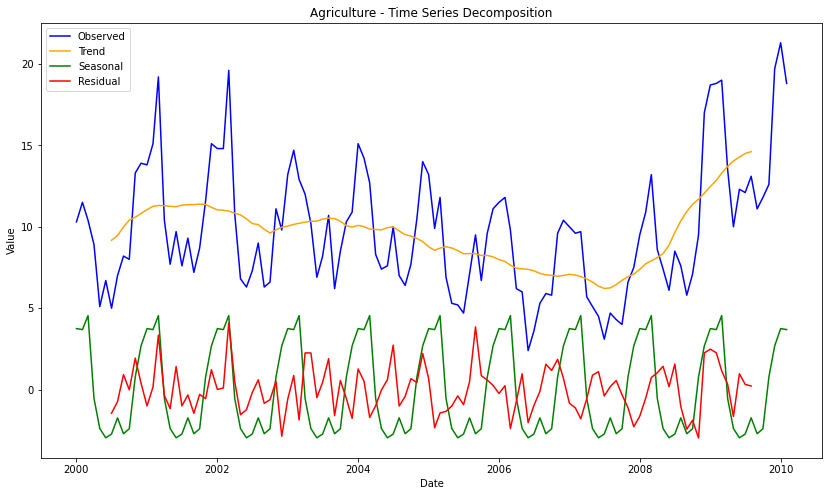

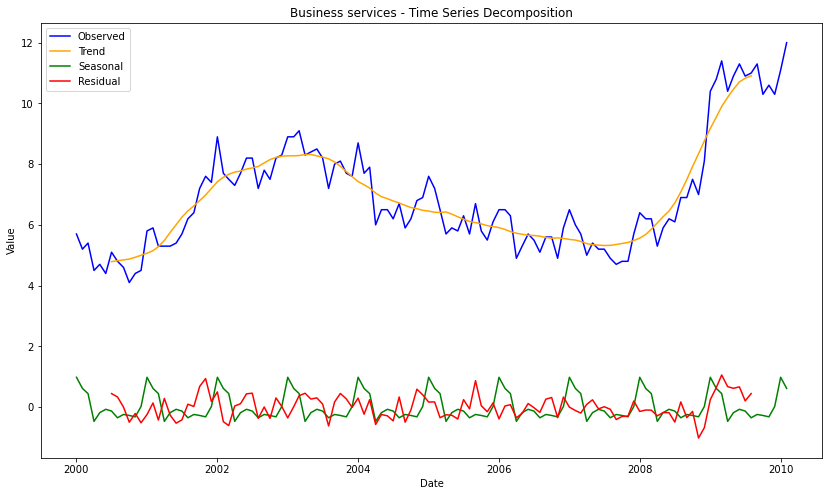

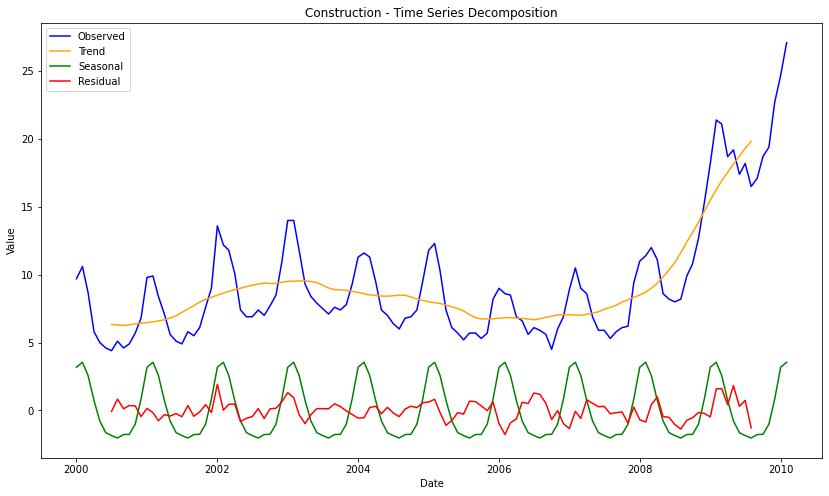

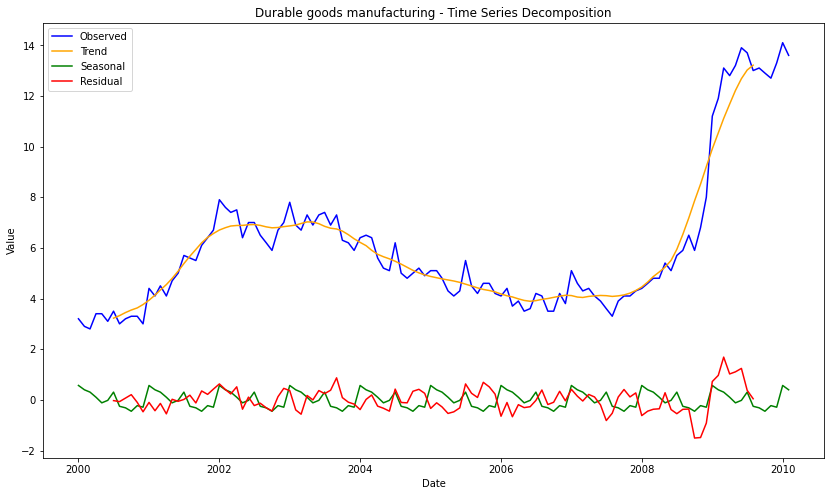

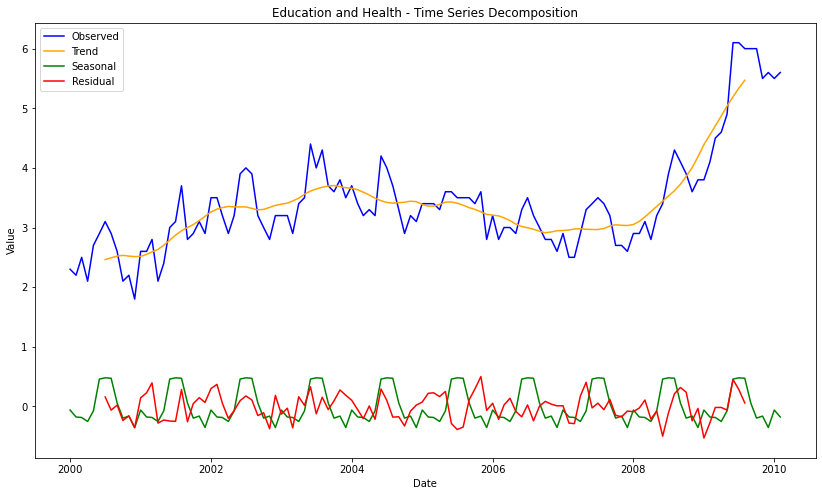

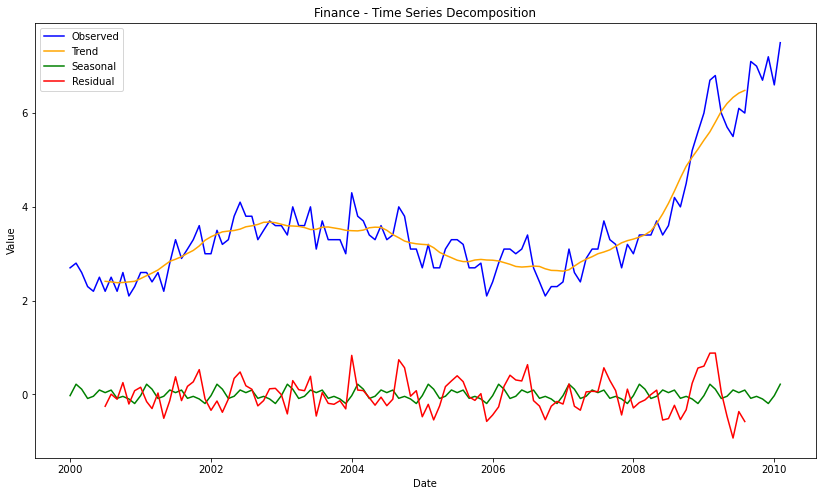

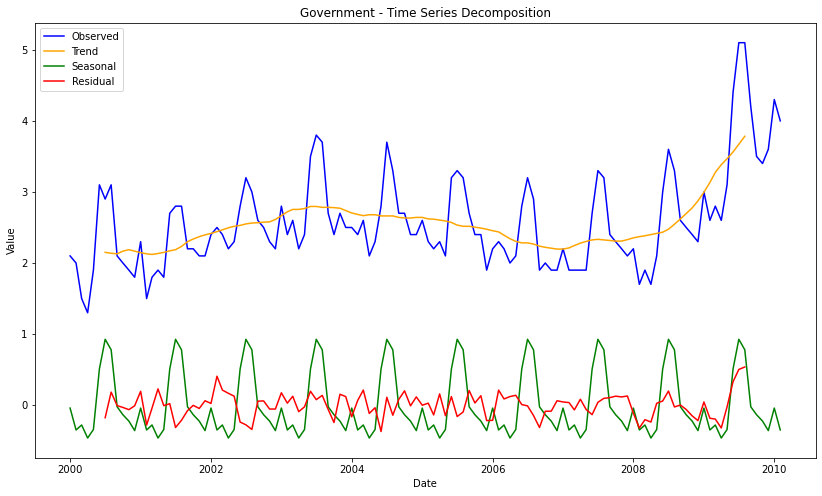

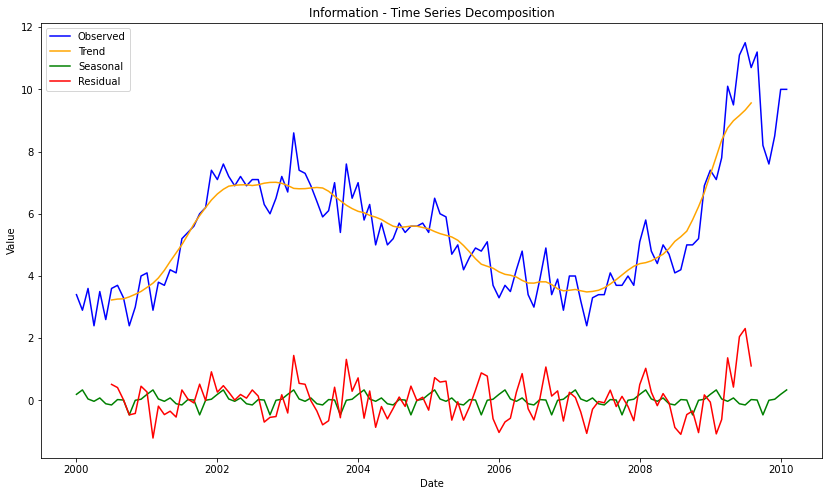

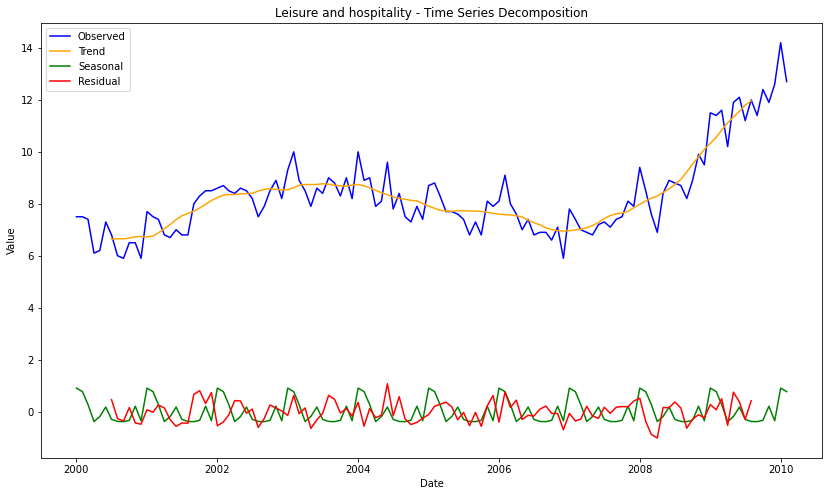

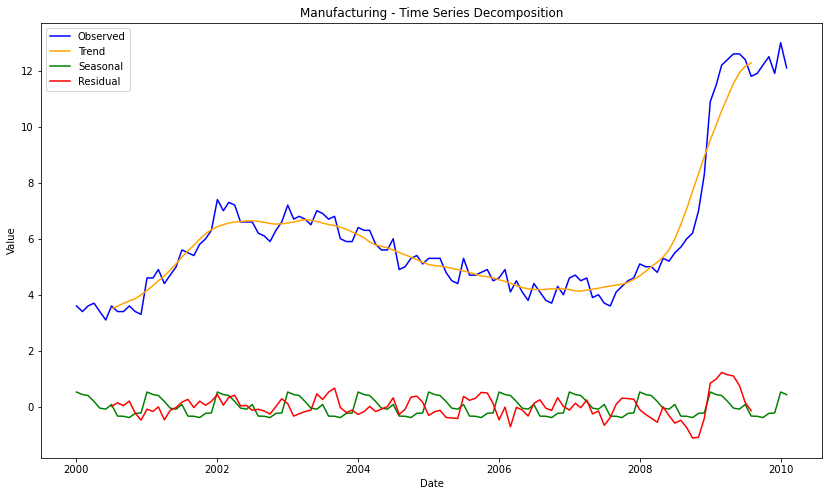

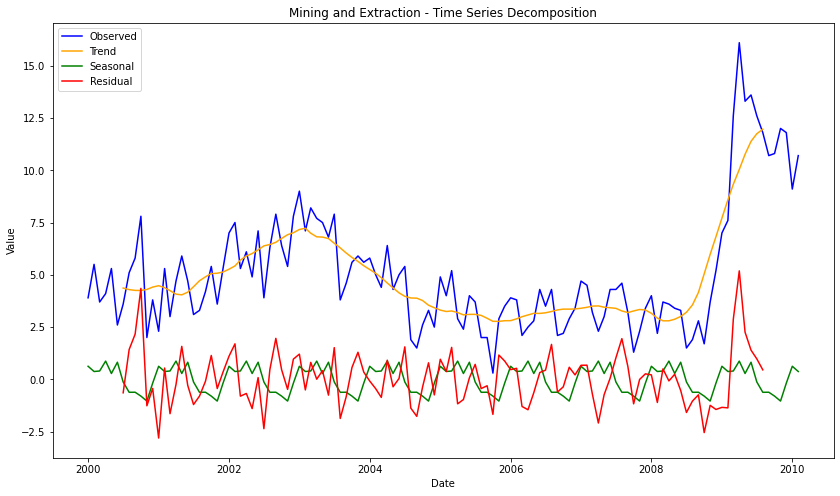

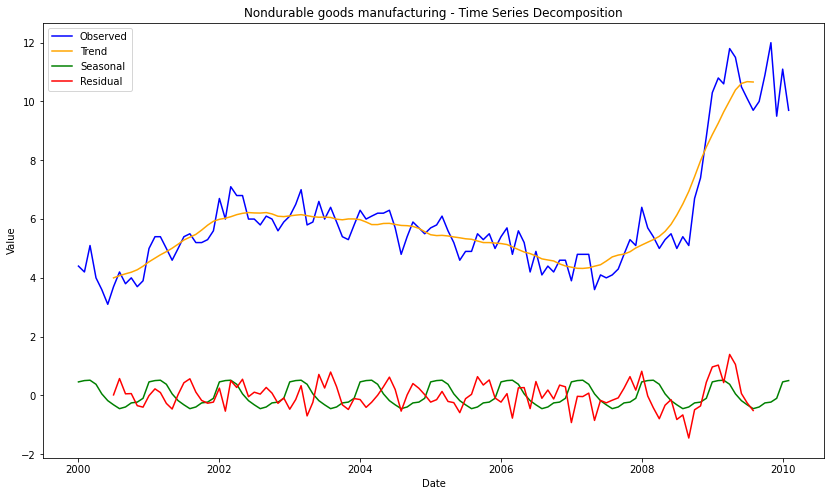

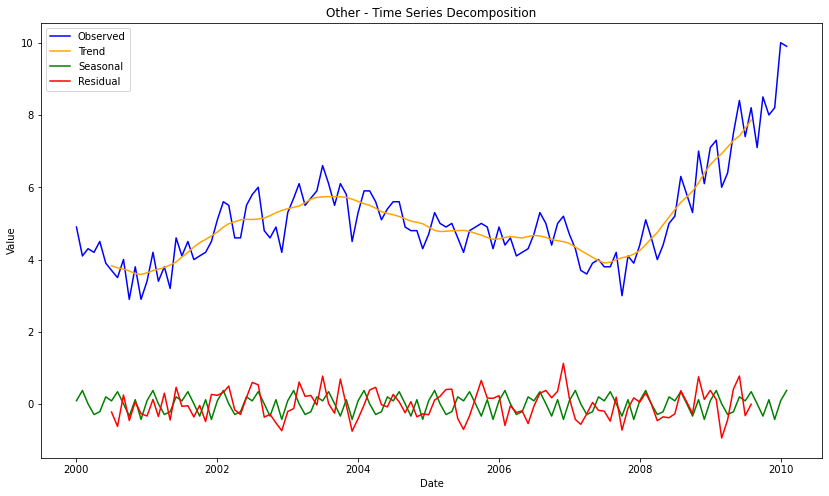

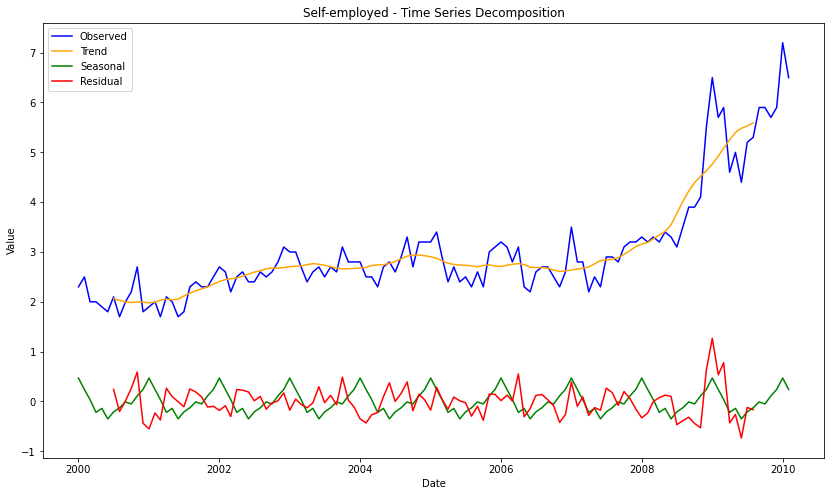

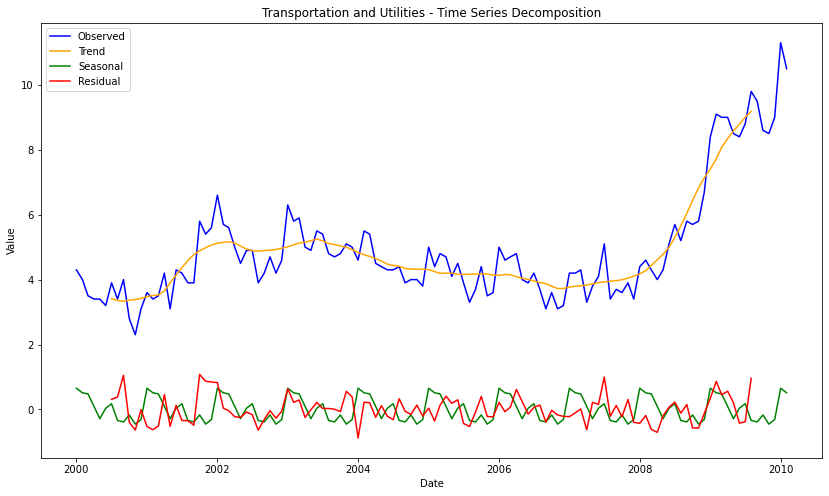

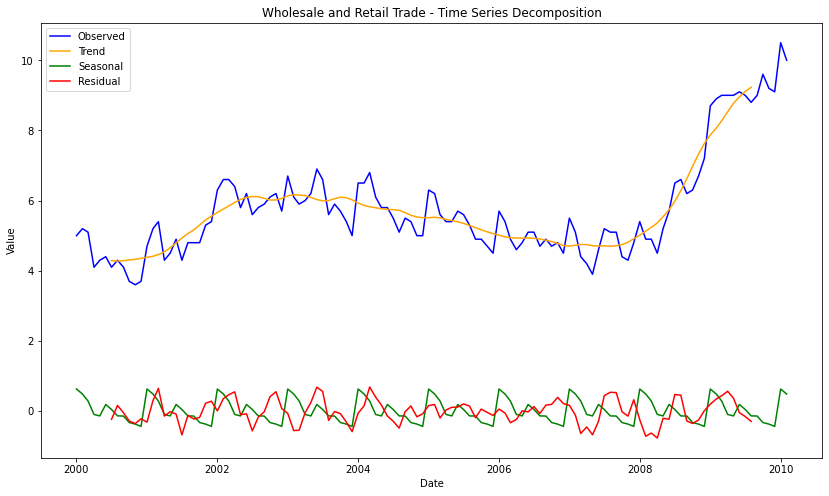

In [12]:
def plot_decomposition_components(series, title):
    result = seasonal_decompose(series, model='additive', period=12)
    
    plt.figure(figsize=(14, 8))
    
    plt.plot(result.observed, label='Observed', color='blue')
    plt.plot(result.trend, label='Trend', color='orange')
    plt.plot(result.seasonal, label='Seasonal', color='green')
    plt.plot(result.resid, label='Residual', color='red')
    
    plt.title(f'{title} - Time Series Decomposition')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend(loc='upper left')
    
    plt.show()

for industry in df.columns:
    plot_decomposition_components(df[industry], industry)


### 6. Visualize the seasonality of Agriculture, Health and Finance sector.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 122 entries, 2000-01-01 to 2010-02-01
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Agriculture                     122 non-null    float64
 1   Business services               122 non-null    float64
 2   Construction                    122 non-null    float64
 3   Durable goods manufacturing     122 non-null    float64
 4   Education and Health            122 non-null    float64
 5   Finance                         122 non-null    float64
 6   Government                      122 non-null    float64
 7   Information                     122 non-null    float64
 8   Leisure and hospitality         122 non-null    float64
 9   Manufacturing                   122 non-null    float64
 10  Mining and Extraction           122 non-null    float64
 11  Nondurable goods manufacturing  122 non-null    float64
 12  Other            

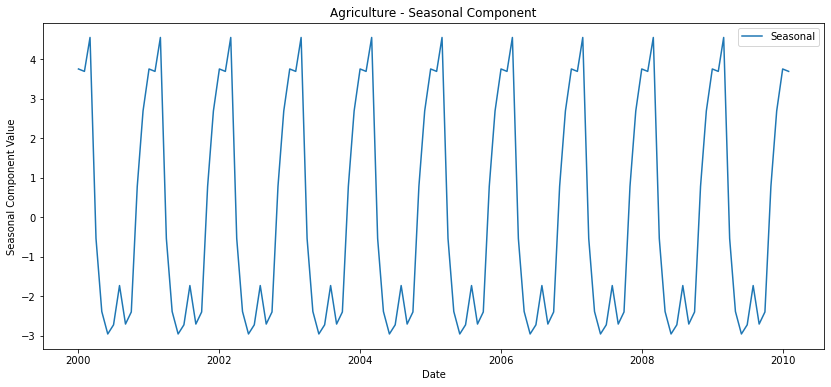

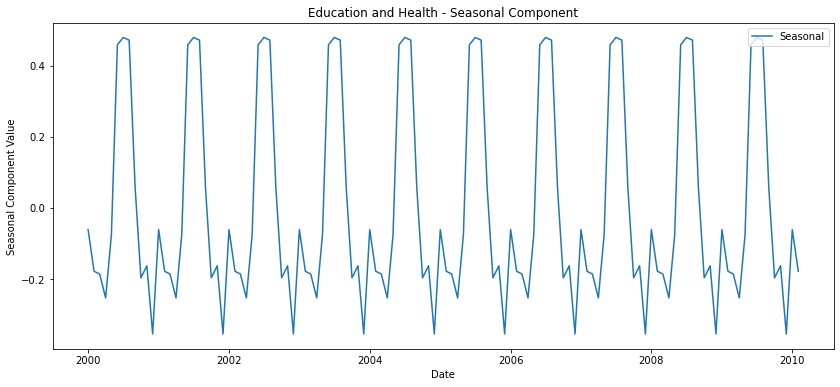

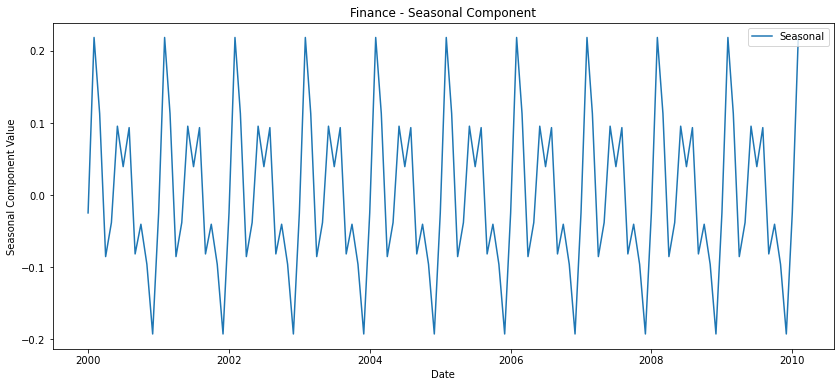

In [14]:
def plot_seasonality(series, title):
    result = seasonal_decompose(series, model='additive', period=12)
    plt.figure(figsize=(14, 6))
    plt.plot(result.seasonal, label='Seasonal')
    plt.title(f'{title} - Seasonal Component')
    plt.xlabel('Date')
    plt.ylabel('Seasonal Component Value')
    plt.legend(loc='upper right')
    
    plt.show()

for sector in ['Agriculture', 'Education and Health', 'Finance']:
    plot_seasonality(df[sector], sector)


### 7. Visualize the seasonality of multiple time series and the correlation between each time series in the dataset.

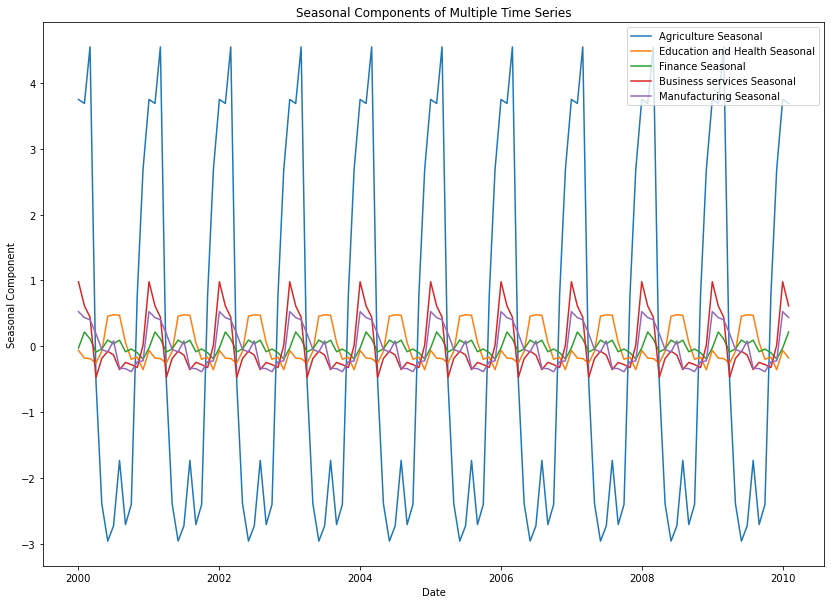

In [15]:
def plot_seasonality_all(df, columns):
    plt.figure(figsize=(14, 10))
    for i, column in enumerate(columns):
        result = seasonal_decompose(df[column], model='additive', period=12)
        plt.plot(result.seasonal, label=f'{column} Seasonal')

    plt.title('Seasonal Components of Multiple Time Series')
    plt.xlabel('Date')
    plt.ylabel('Seasonal Component')
    plt.legend(loc='upper right')
    plt.show()

# Plot seasonality for selected columns
plot_seasonality_all(df, ['Agriculture', 'Education and Health', 'Finance', 'Business services', 'Manufacturing'])


In [16]:
correlation_matrix=df.corr()

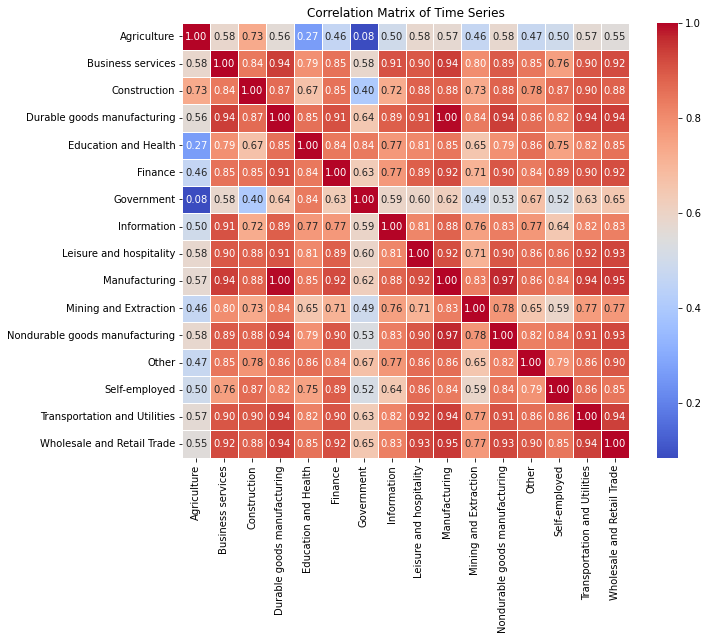

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Time Series')
plt.show()


# EXERCISE 2 : Text Analysis
## Download the amazon_baby.zip file and answer the following:

In [3]:
df=pd.read_csv("amazon_baby.csv")

In [4]:
df.head()

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5


In [6]:
review_counts = df.groupby('name').size()
review_counts_df = review_counts.reset_index(name='Number of reviews')
print(review_counts_df)

                                                    name  Number of reviews
0      # 1 Digital Baby Thermometer - With FREE LIFET...                  4
1      #1 Adjustable Back Seat Baby Safety Mirror - E...                  1
2      #1 Baby Bottle Brush for All Types of Bottles ...                  3
3      #1 Premium Baby Nasal Aspirator by Cutietots -...                  4
4      #120 - 2.5mm Dr Mom Specula Tips - Premium Qua...                  2
...                                                  ...                ...
32412      zCush Cotton Characters Nap Mat, Googly Green                  1
32413  zTcase&trade; Bluetooth Wireless Keyboard Case...                  1
32414  zutano for aden by aden + anais 100% Cotton Mu...                  2
32415  zutano for aden by aden + anais 100% Cotton Mu...                  2
32416  zutano for aden by aden + anais 100% Cotton Mu...                  3

[32417 rows x 2 columns]


### 2. Check the products that have more than 15 reviews.

In [7]:
review_counts_df[review_counts_df['Number of reviews'] > 15]

,name,Number of reviews
10,&quot;A Little Pillow Company&quot; Hypoallerg...,32
56,(1) Cresci Products Window Wedge (2 Per Pack) ...,25
87,*SPECIAL PROMOTION*The Art of CureTM *SAFETY K...,63
88,*The Art of CureTM *SAFETY KNOTTED* - Mixed Co...,24
89,*The Art of CureTM *SAFETY KNOTTED* Lemon - Ce...,21
...,...,...
32284,myBaby Soundspa Lullaby Sound Machine and Proj...,89
32287,mybaby HoMedics SoundSpa On-The-Go,57
32332,"phil&amp;teds Lobster Highchair, Red",31
32355,"phil&amp;teds Traveller Crib, Black",21


### 3. Find any missing review are present or not, If present remove those data

In [8]:
df.isnull().sum()

name      318
review    829
rating      0
dtype: int64

In [9]:
df_cleaned = df.dropna()

In [10]:
df_cleaned.isnull().sum()

name      0
review    0
rating    0
dtype: int64

In [11]:
df=df_cleaned

### 4. Clean the data and remove the special characters and replace the contractions with its expansion by converting the uppercase character to lower case. Also, remove the punctuations

In [12]:
import pandas as pd
import re
import contractions
import string
from textblob import TextBlob

In [13]:
def clean_text(text):
    if pd.isna(text):
        return text
    text = contractions.fix(text)
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    return text

In [14]:
df['review'] = df['review'].apply(clean_text)

### 5. Add the Polarity, length of the review, the word count and average word length of each review

In [15]:
def calculate_polarity(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

def compute_review_metrics(text):
    if pd.isna(text):
        return pd.Series([0, 0, 0, 0], index=['length', 'word_count', 'avg_word_length', 'polarity'])
    
    length = len(text)
    words = text.split()
    word_count = len(words)
    
    if word_count > 0:
        avg_word_length = sum(len(word) for word in words) / word_count
    else:
        avg_word_length = 0
    
    polarity = calculate_polarity(text)
    
    return pd.Series([length, word_count, avg_word_length, polarity], 
                     index=['length', 'word_count', 'avg_word_length', 'polarity'])

In [16]:
metrics_df = df['review'].apply(compute_review_metrics)
df = df.join(metrics_df)
df.head()

,name,review,rating,length,word_count,avg_word_length,polarity
0,Planetwise Flannel Wipes,these flannel wipes are ok but in my opinion n...,3,443.0,79.0,4.594937,0.083333
1,Planetwise Wipe Pouch,it came early and was not disappointed i love ...,5,154.0,30.0,4.166667,0.367000
2,Annas Dream Full Quilt with 2 Shams,very soft and comfortable and warmer than it l...,5,137.0,23.0,5.000000,0.293333
3,Stop Pacifier Sucking without tears with Thumb...,this is a product well worth the purchase i h...,5,380.0,74.0,4.094595,0.318767
4,Stop Pacifier Sucking without tears with Thumb...,all of my kids have cried nonstop when i tried...,5,392.0,76.0,4.131579,0.577778


### 6. Visualize the distribution of the word count, review length, and polarity.

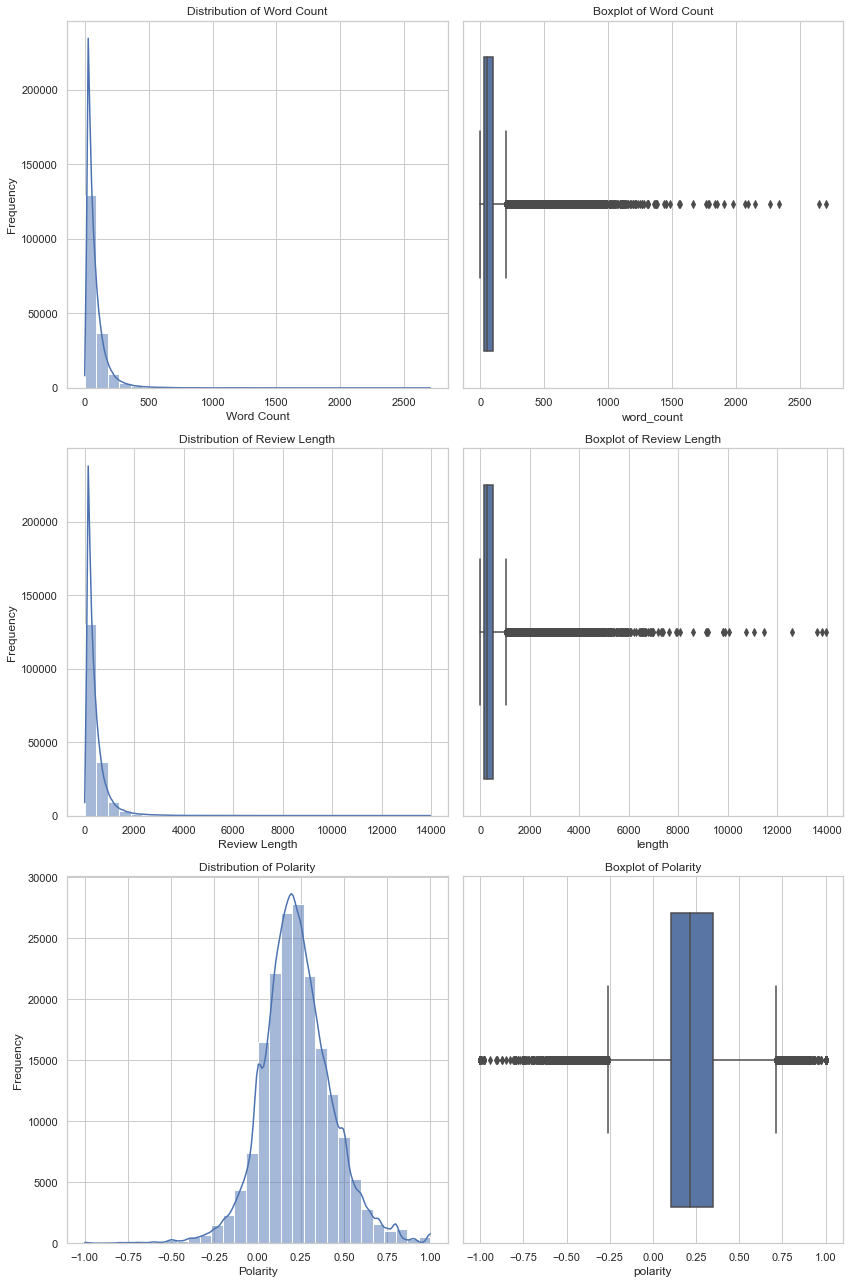

In [21]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(3, 2, figsize=(12, 18))

sns.histplot(df['word_count'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Word Count')
axes[0, 0].set_xlabel('Word Count')
axes[0, 0].set_ylabel('Frequency')

sns.boxplot(x=df['word_count'], ax=axes[0, 1])
axes[0, 1].set_title('Boxplot of Word Count')

sns.histplot(df['length'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Review Length')
axes[1, 0].set_xlabel('Review Length')
axes[1, 0].set_ylabel('Frequency')

sns.boxplot(x=df['length'], ax=axes[1, 1])
axes[1, 1].set_title('Boxplot of Review Length')

sns.histplot(df['polarity'], bins=30, kde=True, ax=axes[2, 0])
axes[2, 0].set_title('Distribution of Polarity')
axes[2, 0].set_xlabel('Polarity')
axes[2, 0].set_ylabel('Frequency')

sns.boxplot(x=df['polarity'], ax=axes[2, 1])
axes[2, 1].set_title('Boxplot of Polarity')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Polarity')

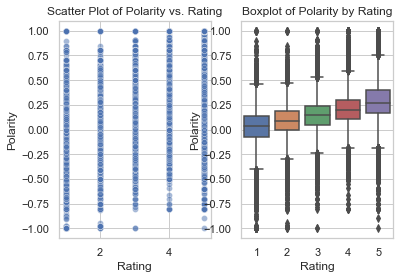

In [22]:

plt.subplot(1, 2, 1)
sns.scatterplot(x='rating', y='polarity', data=df, alpha=0.5)
plt.title('Scatter Plot of Polarity vs. Rating')
plt.xlabel('Rating')
plt.ylabel('Polarity')

plt.subplot(1, 2, 2)
sns.boxplot(x='rating', y='polarity', data=df)
plt.title('Boxplot of Polarity by Rating')
plt.xlabel('Rating')
plt.ylabel('Polarity')

### 9. List the Top 20 products based on the polarity.

In [24]:
df.sort_values(by='polarity', ascending=False).head(20)


,name,review,rating,length,word_count,avg_word_length,polarity
88906,Icy Diamond Tote - Small Insulated Bag for ins...,perfect for five day hikes i can take my medi...,5,75.0,15.0,3.933333,1.0
98553,Token Board,well made works perfect for my son and help me...,5,116.0,24.0,3.833333,1.0
104873,Giant Peel &amp; Stick Nursery Decal - Forest ...,this decal is wonderful it completed my daught...,5,138.0,25.0,4.560000,1.0
73059,"Regalo Easy Step Walk Thru Gate, White",just what we needed for our maltese puppy we ...,5,152.0,30.0,4.033333,1.0
104881,Under the Sea Tropical Fish Nursery/Kids Room ...,perfect for my newborn sons walls he loves lo...,5,98.0,18.0,4.388889,1.0
132780,Sony 900 MHz BabyCall Sound-Sensor Nursery Mon...,work perfectly,5,14.0,2.0,6.500000,1.0
117205,Fisher-Price Little Superstar Step N\' Play Piano,wonderful system and baby loves it,5,48.0,6.0,4.833333,1.0
95637,Lambs &amp; Ivy Jake Hamper,this hamper perfectly matches the bedding set ...,5,124.0,25.0,3.960000,1.0
111196,bumGenius One-Size Snap Closure Cloth Diaper 4...,bought this as a baby shower gift for my best ...,5,111.0,21.0,4.285714,1.0
28891,4moms Cleanwater Infant Bath Tub with Digital ...,perfect,3,7.0,1.0,7.000000,1.0


### 10. Visualize to check whether the review length changes with rating.

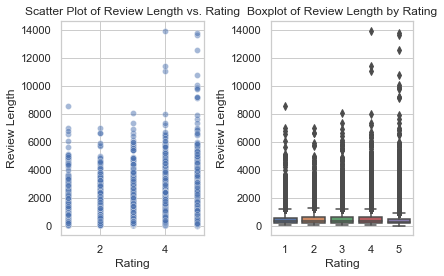

In [25]:
plt.subplot(1, 2, 1)
sns.scatterplot(x='rating', y='length', data=df, alpha=0.5)
plt.title('Scatter Plot of Review Length vs. Rating')
plt.xlabel('Rating')
plt.ylabel('Review Length')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x='rating', y='length', data=df)
plt.title('Boxplot of Review Length by Rating')
plt.xlabel('Rating')
plt.ylabel('Review Length')

# Adjust layout
plt.tight_layout()
plt.show()

### 11. Visualize the distribution of Top 25 Unigram, Bigram and Trigram

In [35]:
pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


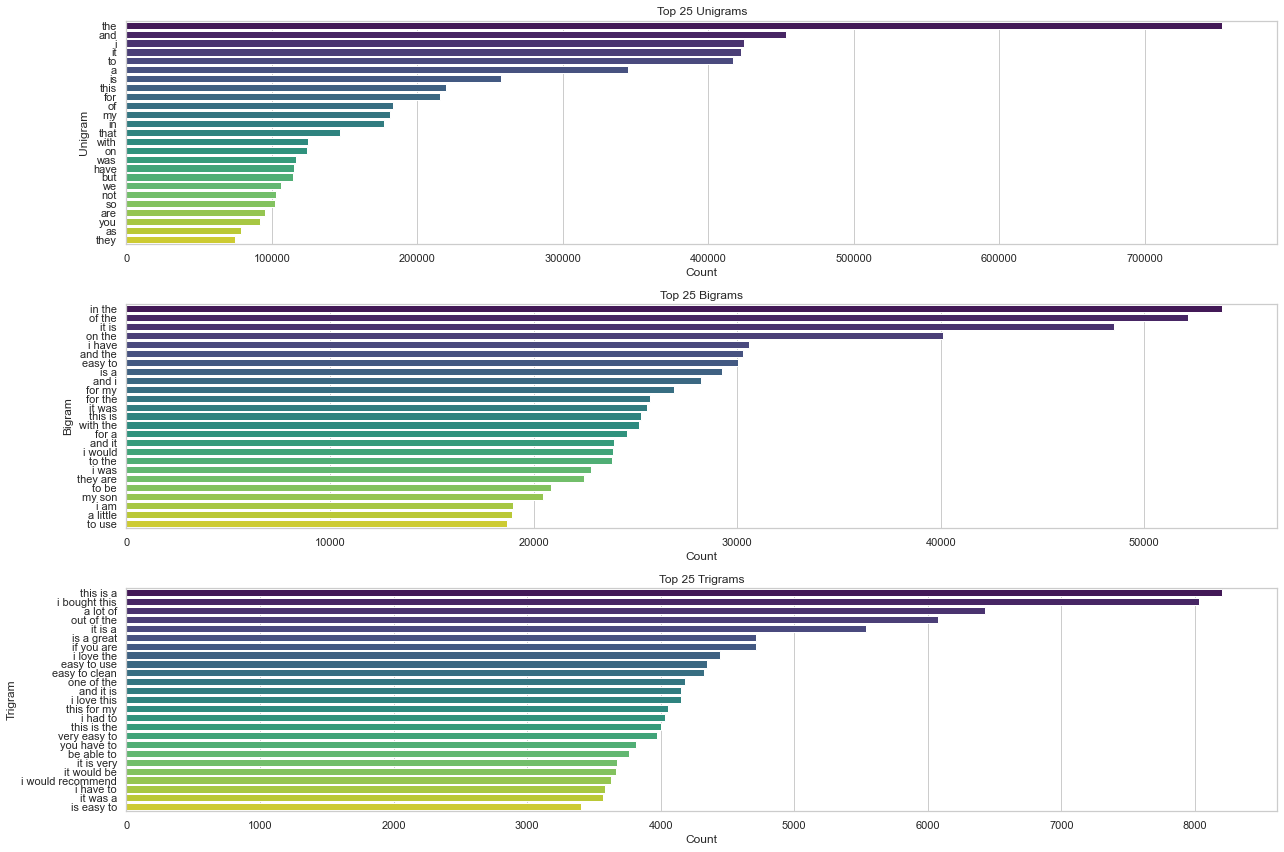

In [37]:
from nltk import ngrams
from collections import Counter
import re


# Function to clean and tokenize text
def clean_text(text):
    text = re.sub(r'\W+', ' ', text.lower())  # Remove non-word characters and convert to lower case
    return text.split()

# Initialize lists to store unigrams, bigrams, and trigrams
unigrams = []
bigrams = []
trigrams = []

# Tokenize each review and collect n-grams
for review in df['review']:
    tokens = clean_text(review)
    unigrams.extend(tokens)
    bigrams.extend(ngrams(tokens, 2))
    trigrams.extend(ngrams(tokens, 3))

# Count frequencies
unigram_counts = Counter(unigrams)
bigram_counts = Counter(bigrams)
trigram_counts = Counter(trigrams)

# Get the top 25 n-grams
top_unigrams = unigram_counts.most_common(25)
top_bigrams = bigram_counts.most_common(25)
top_trigrams = trigram_counts.most_common(25)

# Prepare data for plotting
unigram_df = pd.DataFrame(top_unigrams, columns=['ngram', 'count'])
bigram_df = pd.DataFrame(top_bigrams, columns=['ngram', 'count'])
trigram_df = pd.DataFrame(top_trigrams, columns=['ngram', 'count'])

# Visualize the results
plt.figure(figsize=(18, 12))

# Unigrams
plt.subplot(3, 1, 1)
sns.barplot(x='count', y='ngram', data=unigram_df, palette='viridis')
plt.title('Top 25 Unigrams')
plt.xlabel('Count')
plt.ylabel('Unigram')

# Bigrams
plt.subplot(3, 1, 2)
bigram_df['ngram'] = bigram_df['ngram'].apply(lambda x: ' '.join(x))  # Convert tuples to strings
sns.barplot(x='count', y='ngram', data=bigram_df, palette='viridis')
plt.title('Top 25 Bigrams')
plt.xlabel('Count')
plt.ylabel('Bigram')

# Trigrams
plt.subplot(3, 1, 3)
trigram_df['ngram'] = trigram_df['ngram'].apply(lambda x: ' '.join(x))  # Convert tuples to strings
sns.barplot(x='count', y='ngram', data=trigram_df, palette='viridis')
plt.title('Top 25 Trigrams')
plt.xlabel('Count')
plt.ylabel('Trigram')

# Adjust layout
plt.tight_layout()
plt.show()
